In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

In [3]:
# generating 3D dataset
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)

In [4]:
X_train

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496],
       [ 1.11816122,  0.32508721,  0.31710572],
       [-1.02258878, -0.64384064, -0.13368695],
       [ 0.67351984, -0.27342519, -0.00787835],
       [ 1.01619558,  0.51546608,  0.46783297],
       [ 0.54957723,  0.67728016,  0.2340159 ],
       [-0.98960443,  0.00886617, -0.12152034],
       [ 1.13248106,  0.28229967,  0.06972972],
       [-0.99337712, -0.26832824, -0.15761101],
       [-0.94763679, -0.4995849 , -0.13927911],
       [ 1.10095709,  0.1706481 ,  0.09790432],
       [-0.34604591,  0.45334414,  0.06433843],
       [ 0.69102621, -0.27337761, -0.05926516],
       [ 0.68302902,  0.70421846,  0.24642318],
       [ 0.8774031 , -0.16775101, -0.02162333],
       [-1.06090127, -0.48213721, -0.38573526],
       [ 0.52336644,  0.66585845,  0.390

In [5]:
X_train.mean(axis=0, keepdims=0)

array([0.02406745, 0.20932515, 0.07155422])

In [6]:
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [7]:
X_train

array([[-1.03976771e+00, -7.60238460e-01, -3.32880482e-01],
       [-3.17841939e-02,  3.90260570e-01, -3.64766659e-02],
       [-9.77238797e-01, -6.73862060e-01, -3.20757101e-01],
       [-9.44190485e-01,  7.70779228e-04, -4.97304144e-02],
       [-7.87164831e-01, -5.10641487e-02,  1.19970744e-01],
       [ 1.09409378e+00,  1.15762056e-01,  2.45551498e-01],
       [-1.04665623e+00, -8.53165791e-01, -2.05241169e-01],
       [ 6.49452398e-01, -4.82750342e-01, -7.94325731e-02],
       [ 9.92128132e-01,  3.06140931e-01,  3.96278747e-01],
       [ 5.25509785e-01,  4.67955007e-01,  1.62461684e-01],
       [-1.01367188e+00, -2.00458976e-01, -1.93074561e-01],
       [ 1.10841362e+00,  7.29745189e-02, -1.82449496e-03],
       [-1.01744457e+00, -4.77653389e-01, -2.29165228e-01],
       [-9.71704237e-01, -7.08910047e-01, -2.10833327e-01],
       [ 1.07688965e+00, -3.86770525e-02,  2.63501050e-02],
       [-3.70113351e-01,  2.44018985e-01, -7.21578839e-03],
       [ 6.66958762e-01, -4.82702763e-01

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
# creating autoencoder
encoder = tf.keras.models.Sequential([tf.keras.layers.Dense(2, input_shape=[3])])
decoder = tf.keras.models.Sequential([tf.keras.layers.Dense(3, input_shape=[2])])

auto_encoder = tf.keras.models.Sequential([encoder, decoder])

In [10]:
auto_encoder.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1.5))

In [11]:
history = auto_encoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 3s 7ms/step - loss: 0.2726
Epoch 2/20
2/2 [==============================] - 0s 4ms/step - loss: 0.1026
Epoch 3/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0547
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0512
Epoch 5/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0773
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2136
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 0.1043
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0315
Epoch 9/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0241
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0195
Epoch 11/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0142
Epoch 12/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0106
Epoch 13/20
2/2 [==============================] - 0s 3ms/step - loss: 0.

In [12]:
codings = auto_encoder.predict(X_train)

In [13]:
codings

array([[-1.0508914 , -0.7592457 , -0.3550333 ],
       [ 0.05440062,  0.341547  ,  0.12315446],
       [-0.9767478 , -0.6790303 , -0.3207172 ],
       [-0.9627553 ,  0.00333013, -0.07985005],
       [-0.8897662 , -0.00167181, -0.0755658 ],
       [ 1.0531715 ,  0.14549   ,  0.13695009],
       [-1.1363266 , -0.8093869 , -0.3797191 ],
       [ 0.64586985, -0.47409335, -0.11441845],
       [ 0.9036969 ,  0.35996923,  0.19992314],
       [ 0.5552145 ,  0.4536967 ,  0.2040048 ],
       [-0.9988738 , -0.21561888, -0.15975502],
       [ 1.1826272 ,  0.04076647,  0.11087658],
       [-1.0312994 , -0.4761967 , -0.2539783 ],
       [-1.0307796 , -0.6816972 , -0.32612634],
       [ 1.1170532 , -0.05225635,  0.07277057],
       [-0.33986402,  0.22356345,  0.04907388],
       [ 0.6895205 , -0.48804173, -0.11570542],
       [ 0.69383967,  0.47874558,  0.22427846],
       [ 0.8844746 , -0.3860692 , -0.06374658],
       [-1.0258039 , -0.7290895 , -0.3423631 ],
       [ 0.44903794,  0.48533946,  0.206

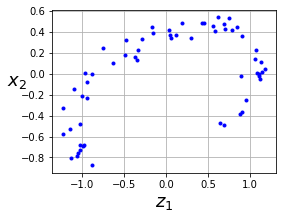

In [14]:
# ploting data with reduced dimensions
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:,1], 'b.')
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

# Stacked AutoEncoder

In [47]:
#
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [48]:
X_train_full = X_train_full.astype(np.float32) / 255

In [49]:
X_test = X_test.astype(np.float32) / 255

In [50]:
# dividing training set into trining and validation set
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

Training All Layers 

In [51]:
def rounded_accuracy(y_true, y_pred):
  return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
# creating auto_encoder

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu')
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[30]),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape([28,28])
])

In [54]:
stacked_ae = tf.keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])

In [55]:
history = stacked_ae.fit(X_train,X_train, epochs=20, validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3814 - rounded_accuracy: 0.8487 - val_loss: 0.3166 - val_rounded_accuracy: 0.9003
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3083 - rounded_accuracy: 0.9127 - val_loss: 0.3021 - val_rounded_accuracy: 0.9197
Epoch 3/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2998 - rounded_accuracy: 0.9203 - val_loss: 0.2982 - val_rounded_accuracy: 0.9205
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2959 - rounded_accuracy: 0.9240 - val_loss: 0.2937 - val_rounded_accuracy: 0.9285
Epoch 5/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2928 - rounded_accuracy: 0.9268 - val_loss: 0.2919 - val_rounded_accuracy: 0.9285
Epoch 6/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2920 - rounded_accuracy: 0.9283 - val_loss: 0.2915 - val_rounded_accuracy: 0.9306
Epoch 7/20
1719/1719 [==================

In [56]:
def show_reconstruction(model, images=X_valid, n_images=5):
  reconstruction = model.predict(images[:n_images])
  fig = plt.figure(figsize=(n_images*1.5, 3))
  for image_index in range(n_images):
    plt.subplot(2, n_images, image_index +1)
    plt.imshow(images[image_index], cmap='binary')
    plt.subplot(2, n_images, n_images + image_index +1)
    plt.imshow(reconstruction[image_index], cmap='binary')

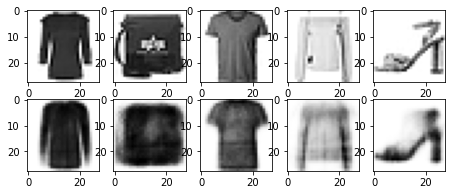

In [57]:
show_reconstruction(stacked_ae)

Visulizing fashion_mnist

In [58]:
np.random.seed(42)

from sklearn.manifold import TSNE

tsne = TSNE()



In [59]:
X_valid_compressed = stacked_encoder.predict(X_valid)

In [60]:
X_valid_2d = tsne.fit_transform(X_valid_compressed)

In [61]:
X_valid_2d = (X_valid_2d - X_valid_2d.min()) / (X_valid_2d.max() - X_valid_2d.min())

(-0.05, 1.05, 0.05114558488130569, 0.935896871984005)

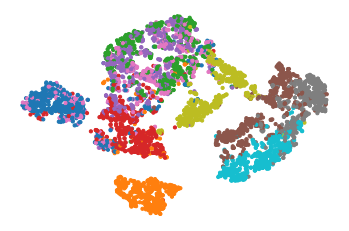

In [63]:
# ploting 
plt.scatter(X_valid_2d[:,0], X_valid_2d[:,1], c=y_valid, cmap='tab10', s=10)
plt.axis("off")

In [68]:
import matplotlib as mpl

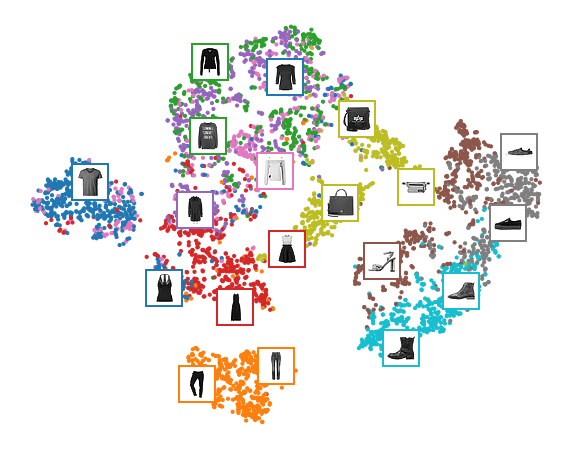

In [69]:
## Let's make graph more prettier (optional)
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2d[:, 0], X_valid_2d[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2d):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
# save_fig("fashion_mnist_visualization_plot")
plt.show()

using convolutional layers instead of Dense Layers

In [70]:
tf.random.set_seed(42)
np.random.seed(42)

In [73]:
conv_encoder = keras.models.Sequential([
  keras.layers.Reshape([28,28,1], input_shape=[28,28]),
  keras.layers.Conv2D(16, kernel_size=3, padding='SAME', activation='selu'),
  keras.layers.MaxPool2D(pool_size=2),
  keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation='selu'),
  keras.layers.MaxPool2D(pool_size=2),
  keras.layers.Conv2D(64, kernel_size=3, padding='SAME', activation='selu'),
  keras.layers.MaxPool2D(pool_size=2)
])

In [78]:
conv_decoder = keras.models.Sequential([
  keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation='selu', input_shape=[3,3,64]),
  keras.layers.Conv2DTranspose(14, kernel_size=16, strides=2, padding="SAME", activation='selu'),
  keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation='sigmoid'),
  keras.layers.Reshape([28,28])
])

In [79]:
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

In [80]:
conv_ae.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=1.0),
                metrics=[rounded_accuracy])

In [81]:
history = conv_ae.fit(X_train, X_train, epochs=5, validation_data=[X_valid, X_valid])

Epoch 1/5
1719/1719 [==============================] - 37s 4ms/step - loss: 0.3320 - rounded_accuracy: 0.8950 - val_loss: 0.0000e+00 - val_rounded_accuracy: 0.0000e+00
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2769 - rounded_accuracy: 0.9407 - val_loss: 0.0000e+00 - val_rounded_accuracy: 0.0000e+00
Epoch 3/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2713 - rounded_accuracy: 0.9458 - val_loss: 0.0000e+00 - val_rounded_accuracy: 0.0000e+00
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2690 - rounded_accuracy: 0.9485 - val_loss: 0.0000e+00 - val_rounded_accuracy: 0.0000e+00
Epoch 5/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2671 - rounded_accuracy: 0.9506 - val_loss: 0.0000e+00 - val_rounded_accuracy: 0.0000e+00


In [82]:
conv_encoder.summary()
conv_decoder.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)        

In [83]:
conv_ae.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_10 (Sequential)   (None, 3, 3, 64)          23296     
_________________________________________________________________
sequential_12 (Sequential)   (None, 28, 28)            133293    
Total params: 156,589
Trainable params: 156,589
Non-trainable params: 0
_________________________________________________________________


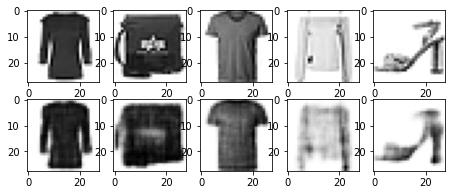

In [84]:
show_reconstruction(conv_ae)
plt.show()

Recurrent AutoEncoder

In [87]:
recurrent_encoder = keras.models.Sequential([
  keras.layers.LSTM(100, return_sequences=True, input_shape=[28,28]),
  keras.layers.LSTM(30)
])

In [92]:
recurrent_decoder = keras.models.Sequential([
  keras.layers.RepeatVector(28, input_shape=[28]),
  keras.layers.LSTM(30),
  keras.layers.TimeDistributed(keras.layers.Dense(28, activation='sigmoid')) # error in this line
])

In [ ]:
recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])

In [ ]:
recurrent_ae.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=0.1), metrics=[rounded_accuracy])

In [ ]:
recurrent_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

In [ ]:
# showing images
show_reconstruction(recurrent_ae)
plt.show()

Stacked Denoiseing AutoEncoder

In [93]:
# setting random seed
tf.random.set_seed(42)
np.random.seed(42)

# creating autoencoder
denoising_encoder = keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=[28,28]),
  tf.keras.layers.GaussianNoise(0.2),
  tf.keras.layers.Dense(100, activation='selu'),
  tf.keras.layers.Dense(30, activation='selu')
])

In [94]:
denoising_decoder = keras.models.Sequential([
  tf.keras.layers.Dense(100, activation='selu', input_shape=[30]),
  tf.keras.layers.Dense(28*28, activation='sigmoid'),
  tf.keras.layers.Reshape([28,28])
])

In [95]:
denoising_ae = keras.models.Sequential([ denoising_encoder, denoising_decoder ])

In [97]:
denoising_ae.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=1.0), metrics=[rounded_accuracy])

In [99]:
denoising_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3121 - rounded_accuracy: 0.9097 - val_loss: 0.3095 - val_rounded_accuracy: 0.9098
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3057 - rounded_accuracy: 0.9151 - val_loss: 0.3033 - val_rounded_accuracy: 0.9207
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3020 - rounded_accuracy: 0.9184 - val_loss: 0.3041 - val_rounded_accuracy: 0.9117
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2992 - rounded_accuracy: 0.9209 - val_loss: 0.2968 - val_rounded_accuracy: 0.9254
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2969 - rounded_accuracy: 0.9229 - val_loss: 0.2949 - val_rounded_accuracy: 0.9263
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2952 - rounded_accuracy: 0.9244 - val_loss: 0.2939 - val_rounded_accuracy: 0.9280
Epoch 7/10
1719/1719 [==================